# 🧬 TWISSTNTERN Demo Notebook

**Welcome to TWISSTNTERN!** 
This notebook will teach you how to analyze topology weights using ternary plots.
##  What is TWISSTNTERN?

TWISSTNTERN is a tool for analyzing phylogenetic tree topology weights in a ternary framework. When you have four populations and look at their relationships, there are only 3 possible unrooted subtrees. TWISSTNTERN helps you visualize and analyze these relationships.

### Key Concepts:
- **Ternary Plot**: A triangle where each corner represents one of the three possible tree topologies
- **Topology Weights**: How much each genomic window supports each of the three possible trees in relative terns (their proportions i.e. weights)
- **D_LR Statistic**: Measures asymmetry between left and right sides of the triangle

## What You'll Learn:
1. How to install and set up TWISSTNTERN        
2. How to analyze existing data files  
3. How to understand the output visualizations 
4. How to simulate and analyze data (optional) 


In [39]:
# Possible topologies of a four-population tree

"""
Unrooted:                         Rooted (O as outgroup):

O-\    /-C                           /-O
   |--|                             |
B-/    \-A                     -----|
                                    |   /-B
                                    \--|
                                       |  /-A
                                       \--|
                                          \-C


O-\    /-A                           /-O
   |--|                             |
C-/    \-B                     -----|
                                    |   /-C
                                    \--|
                                       |   /-B
                                        \--|
                                           \-A


O-\    /-B                           /-O
   |--|                             |
A-/    \-C                     -----|
                                    |   /-A
                                     \--|
                                        |  /-C
                                        \--|
                                           \- B
                                           
"""

'\nUnrooted:                         Rooted (O as outgroup):\n\nO-\\    /-C                           /-O\n   |--|                             |\nB-/    \\-A                     -----|\n                                    |   /-B\n                                    \\--|\n                                       |  /-A\n                                       \\--|\n                                          \\-C\n\n\nO-\\    /-A                           /-O\n   |--|                             |\nC-/    \\-B                     -----|\n                                    |   /-C\n                                    \\--|\n                                       |   /-B\n                                        \\--|\n                                           \\-A\n\n\nO-\\    /-B                           /-O\n   |--|                             |\nA-/    \\-C                     -----|\n                                    |   /-A\n                                     \\--|\n            

## Installation and Setup
First, let's make sure you have TWISSTNTERN installed. If you haven't installed it yet, you can do so with:

In [40]:
# Check if twisstntern is installed
try:
    import twisstntern
    print("✅ TWISSTNTERN is installed!")
    print(f"📦 Version: {twisstntern.__version__ if hasattr(twisstntern, '__version__') else 'Unknown'}")
except ImportError:
    print("❌ TWISSTNTERN is not installed.")
    print("\n📥 To install, run one of these commands:")        
    print("pip install git+https://github.com/HilaLifchitz/twisstntern_v2") # TO BE UPDATE TO pip install later!!!

✅ TWISSTNTERN is installed!
📦 Version: 0.1.0


## Downloading Example Data

In this section, we will download example data files to demonstrate the use of **TWISSTNTERN**.  
We will begin with the **Littorina** dataset from [our recent publication](https://www.science.org/doi/10.1126/science.adi2982).

You may also explore the **Neurospora** dataset, which is already included in the `Examples/data_files/` directory.


In [ ]:
import os
import urllib.request
from pathlib import Path

# Create data directory
data_dir = Path("data_files")
data_dir.mkdir(exist_ok=True)

# Files to download\
files_to_download = {
    "Littorina_data.csv": "https://raw.githubusercontent.com/HilaLifchitz/twisstntern_v2/main/Examples/data_files/Littorina_data.csv",
    "neurospora_weights.csv" : "https://raw.githubusercontent.com/HilaLifchitz/twisstntern_v2/main/Examples/data_files/neurospora_weights.csv"
}

print("🔄 Downloading example data files...")

"for filename, url in files_to_download.items():\n",
"    filepath = data_dir / filename\n",
"    if not filepath.exists():\n",
"        print(f\"⬇️ Downloading {filename}...\")\n",
"        try:\n",
"            urllib.request.urlretrieve(url, filepath)\n",
"            print(f\"✅ Downloaded {filename}\")\n",
"        except Exception as e:\n",
"            print(f\"❌ Failed to download {filename}: {e}\")\n",
"    else:\n",
"        print(f\"✅ {filename} already exists\")\n",
"\n",
"print(f\"\\n🎉 All data files ready in: {data_dir.absolute()}\")"

🔄 Downloading example data files...


'print(f"\\n🎉 All data files ready in: {data_dir.absolute()}")'

## Understanding Your Data

Let’s first look at what the data looks like. **TWISSTNTERN** works with **topology weights**, where:

- Each **row** represents a **genomic window**.
- Each **column** corresponds to the **proportion (weight)** of a given topology — labeled **T1**, **T2**, and **T3**.
- These weights are **proportions**, so each row **must sum to 1**.

The mathematical space of three non-negative coordinates that sum to 1 is called a **[2D simplex](https://en.wikipedia.org/wiki/Simplex)**, and it can be visualized as a triangle.

- Each point inside this triangle represents a unique combination of topology weights corresoinding to its specific genomic window.
- The coordinates in this space are called **ternary coordinates** — which is where the *“tern”* in **TWISSTNTERN** comes from.


In [42]:
import pandas as pd
import numpy as np
from twisstntern.utils import dump_data 

# Load and examine the Littorina data
littorina_file = data_dir / "Littorina_data.csv"
original_data = pd.read_csv(littorina_file)

print("📊 Littorina Dataset Overview:")
print(f"   • Total data points: {len(original_data):,}")
print(f"   • Columns: {list(original_data.columns)}")
print("\n First 5 rows of the original data:")
print(original_data.head())

print("\n Original data Statistics:")
print(original_data.describe())

print("\nThe data is not yet normalized to create the weights.")
print("\nTWISSTNTERN dows this automatically when it loads the data.")


data = dump_data(littorina_file)
print(data.head())
print(f"   • Columns: {list(data.columns)}")

# Check if weights sum to 1 (they should!)
weight_sums = data[['T1', 'T2', 'T3']].sum(axis=1)
print(f"\n✅ Weight validation: All rows sum to 1? {np.allclose(weight_sums, 1.0)}")

📊 Littorina Dataset Overview:
   • Total data points: 161,673
   • Columns: ['topo1', 'topo3', 'topo2']

 First 5 rows of the original data:
   topo1  topo3  topo2
0   2434   1296   6270
1   1760    579   7661
2    584   1815   7601
3   2927   3419   3654
4   3166   2489   4345

 Original data Statistics:
               topo1          topo3          topo2
count  161673.000000  161673.000000  161673.000000
mean     3068.575977    3102.462489    3828.961533
std      1134.704429    1072.613711    1402.591357
min         0.000000       0.000000       0.000000
25%      2405.000000    2484.000000    2946.000000
50%      3020.000000    3081.000000    3569.000000
75%      3601.000000    3653.000000    4485.000000
max     10000.000000    9858.000000   10000.000000

The data is not yet normalized to create the weights.

TWISSTNTERN dows this automatically when it loads the data.

Attempting to read file: data_files/Littorina_data.csv

Trying delimiter: ','
  Skip 0 rows: Found 3 numeric columns


## Method 1: Using TWISSTNTERN from Python

Now let's analyze our data using TWISSTNTERN's Python interface. This is the most flexible way to use the tool.

INFO:twisstntern.pipeline:Output directory: littorina_analysis
INFO:twisstntern.pipeline:Detected file type: csv
INFO:twisstntern.pipeline:Using CSV file directly for analysis
INFO:twisstntern.pipeline:Loading data from: data_files/Littorina_data.csv


🔬 Running TWISSTNTERN analysis on Littorina data...
Detected CSV file format. Using file directly for analysis...
Loading data from: data_files/Littorina_data.csv

Attempting to read file: data_files/Littorina_data.csv

Trying delimiter: ','
  Skip 0 rows: Found 3 numeric columns
  Found 3 numeric columns with delimiter ',' skipping 0 rows

Using delimiter: ',', skipping 0 rows
Successfully read entire file


INFO:twisstntern.pipeline:Assuming columns are T1, T2, T3 (in order).
INFO:twisstntern.pipeline:Loaded data shape: (161525, 3)
INFO:twisstntern.pipeline:Running triangle analysis...
INFO:twisstntern.pipeline:Triangle analysis completed. Results shape: (45, 7)
INFO:twisstntern.pipeline:Running fundamental asymmetry analysis...
INFO:twisstntern.pipeline:============================================================
INFO:twisstntern.pipeline:FUNDAMENTAL ASYMMETRY RESULTS
INFO:twisstntern.pipeline:============================================================
INFO:twisstntern.pipeline:Data file used: data_files/Littorina_data.csv
INFO:twisstntern.pipeline:Total data points before downsampling: 161525
INFO:twisstntern.pipeline:Total data points used in symmetry analysis: 161525 (n_right + n_left = 161525)
INFO:twisstntern.pipeline:Note: 0 data points were filtered out (where T2 = T3, which fall exactly on the y-axis in ternary space)
INFO:twisstntern.pipeline:n_right: 99611
INFO:twisstntern.pip


Data loaded and normalized. Points with T2 == T3 removed. Remaining rows: 161525
Running triangle analysis...
Running fundamental asymmetry analysis...
Generating visualizations...


INFO:twisstntern.pipeline:Saving results...
INFO:twisstntern.pipeline:Saved triangle analysis results to: littorina_analysis/Littorina_data_triangle_analysis_0.1.csv
INFO:twisstntern.pipeline:Analysis pipeline completed successfully!


Saved triangle analysis results to: littorina_analysis/Littorina_data_triangle_analysis_0.1.csv
Analysis pipeline completed successfully!
✅ Analysis complete!
📁 Results saved in: littorina_analysis/
📊 Generated CSV file: data_files/Littorina_data.csv


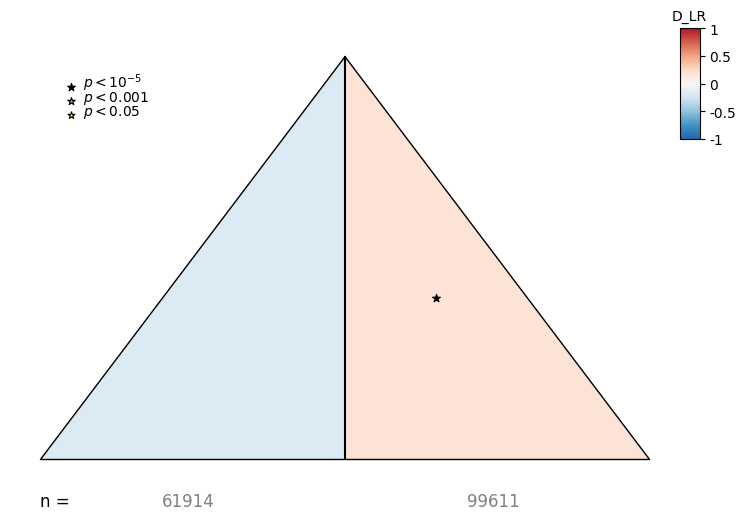

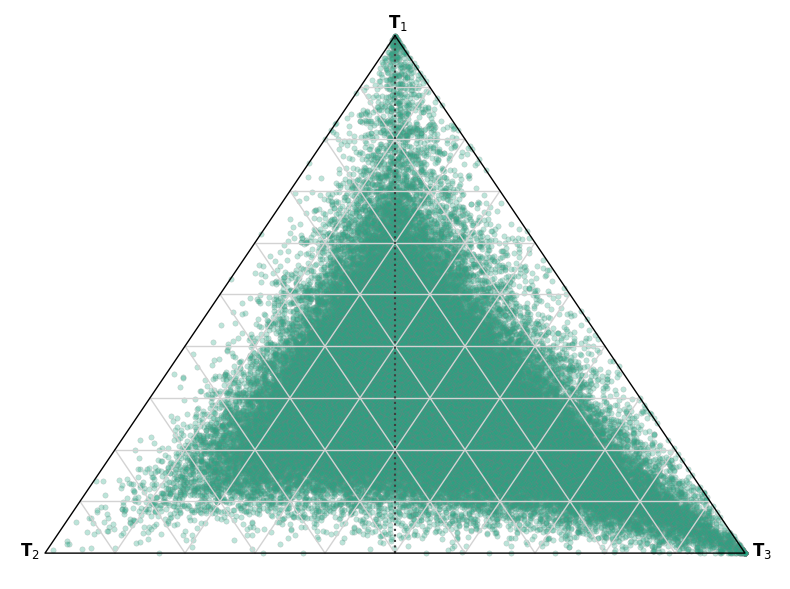

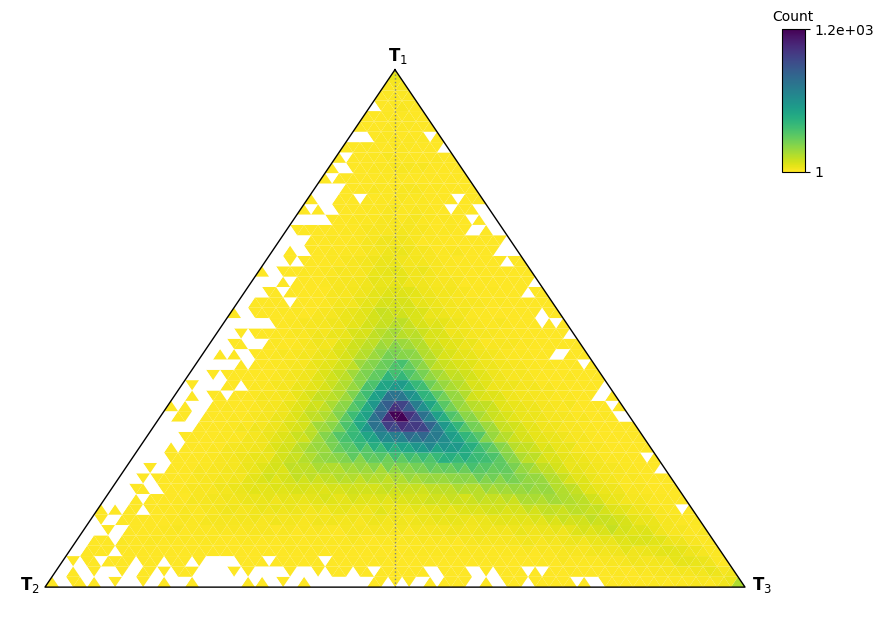

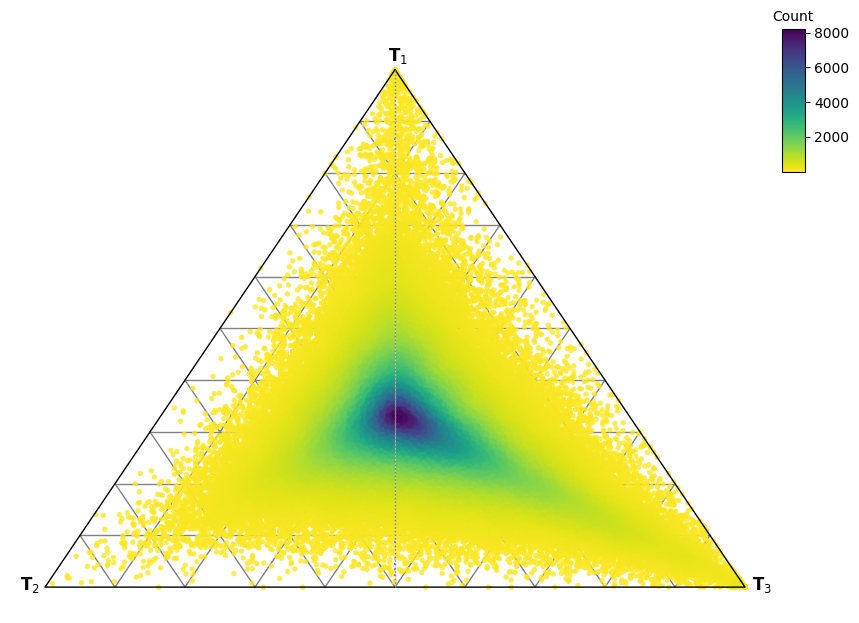

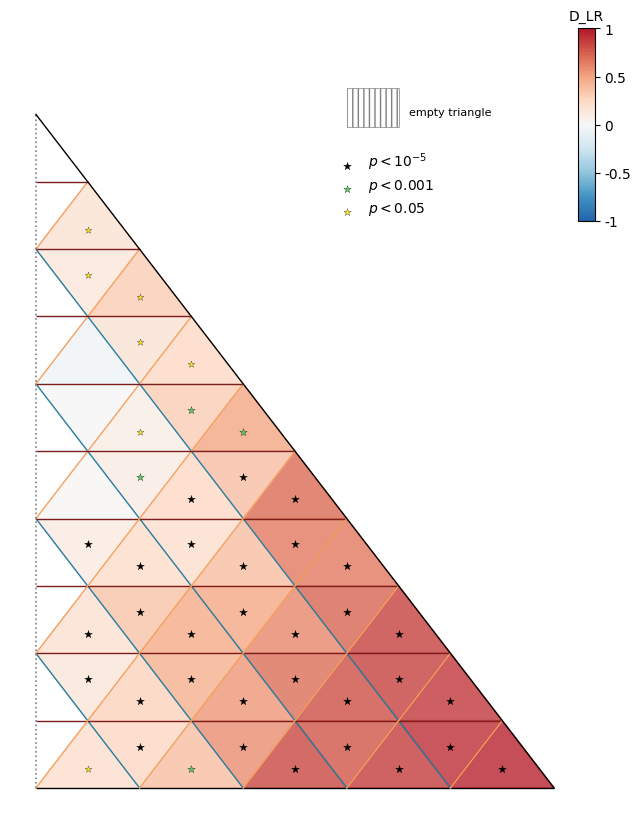

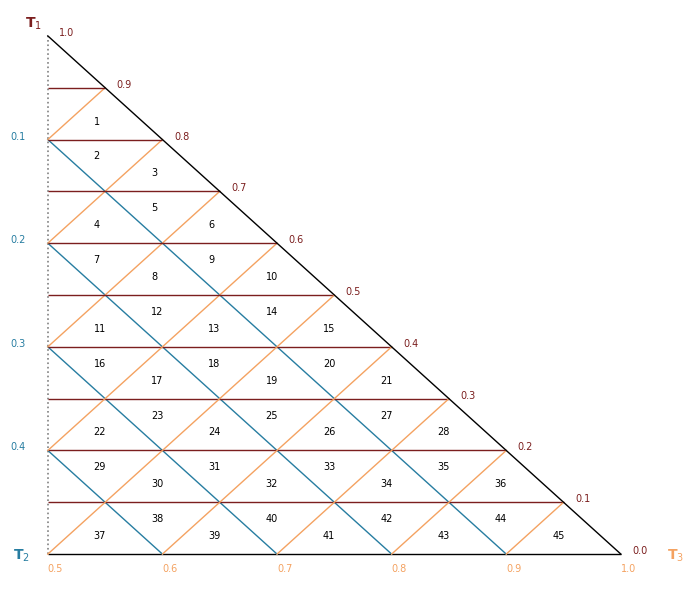

In [43]:
from twisstntern import run_analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("🔬 Running TWISSTNTERN analysis on Littorina data...")

# Run the analysis
results, fundamental_results, csv_file = run_analysis(
    file=str(littorina_file),
    granularity=0.1,  # Standard resolution
    output_dir="littorina_analysis"
)
 
print("✅ Analysis complete!")
print(f"📁 Results saved in: littorina_analysis/")
print(f"📊 Generated CSV file: {csv_file}")

In [50]:
results

,"coord. (T1, T2, T3)",n_right,n_left,D-LR,g-test,p-value(g-test),index
full dataset,main subtriangle,64,36,0.280000,7.945797,0.004820,NA
0,"[(0.0, 0.1), (0.0, 0.1), (0.9, 1.0)]",0,0,NaN,NaN,NaN,45
1,"[(0.0, 0.1), (0.0, 0.1), (0.8, 0.9)]",0,0,NaN,NaN,NaN,44
2,"[(0.0, 0.1), (0.1, 0.2), (0.8, 0.9)]",0,0,NaN,NaN,NaN,43
3,"[(0.0, 0.1), (0.1, 0.2), (0.7, 0.8)]",0,0,NaN,NaN,NaN,42
4,"[(0.0, 0.1), (0.2, 0.3), (0.7, 0.8)]",0,0,NaN,NaN,NaN,41
5,"[(0.0, 0.1), (0.2, 0.3), (0.6, 0.7)]",0,0,NaN,NaN,NaN,40
6,"[(0.0, 0.1), (0.3, 0.4), (0.6, 0.7)]",0,0,NaN,NaN,NaN,39
7,"[(0.0, 0.1), (0.3, 0.4), (0.5, 0.6)]",0,0,NaN,NaN,NaN,38
8,"[(0.0, 0.1), (0.4, 0.5), (0.5, 0.6)]",0,0,NaN,NaN,NaN,37


## Understanding the Output

Let's examine what TWISSTNTERN produced and understand the key metrics.

In [44]:
# Examine the fundamental asymmetry results
n_right, n_left, D_LR, G_test, p_value = fundamental_results

print("🔍 FUNDAMENTAL ASYMMETRY ANALYSIS")
print("=" * 50)
print(f"📊 Points in right half: {n_right:,}")
print(f"📊 Points in left half: {n_left:,}")
print(f"📊 D_LR statistic: {D_LR:.4f}")
print(f"📊 G-test statistic: {G_test:.4f}")
print(f"📊 P-value: {p_value:.6f}")

# Interpret the results
print("\n💡 INTERPRETATION:")
if p_value < 0.05:
    print("   ✅ Significant asymmetry detected (p < 0.05)")
    if D_LR > 0:
        print("   ➡️ Bias toward right side of triangle")
    else:
        print("   ⬅️ Bias toward left side of triangle")
else:
    print("   ⚖️ No significant asymmetry detected (p ≥ 0.05)")

print(f"\n Asymmetry strength: {abs(D_LR):.4f}")

🔍 FUNDAMENTAL ASYMMETRY ANALYSIS
📊 Points in right half: 99,611
📊 Points in left half: 61,914
📊 D_LR statistic: 0.2334
📊 G-test statistic: nan
📊 P-value: 0.000000

💡 INTERPRETATION:
   ✅ Significant asymmetry detected (p < 0.05)
   ➡️ Bias toward right side of triangle

 Asymmetry strength: 0.2334


## Advanced Feature: 

### 1.Colormap Customization

TWISSTNTERN allows you to customize the visual appearance of your plots using different colormaps. This affects the `heatmap.png` and `radcount.png` visualizations.

**Available Colormaps:**
- `viridis_r` (default): Reversed viridis, colorblind-friendly
- `viridis`: Modern purple-to-yellow, scientific publications
- `plasma`: Vibrant purple-pink-yellow, eye-catching presentations
- `inferno`: Dark dramatic gradient, high contrast needed
- `Blues`: Classic sequential blue, publication-ready
- `Greys`: Clean grayscale, print-friendly

**Example:**

```python
# Run analysis with a custom colormap
results, fundamental_results, csv_file = run_analysis(
    file=str(littorina_file),
    granularity=0.1,
    output_dir="littorina_analysis_plasma",
    colormap="plasma"
    )

The colormap option influences the `heatmap.png` and `radcount.png` plots in your output directory.


### 2. Running on Newick Files: Taxon Names, Outgroup, and Topology Mapping
TWISSTNTERN can also analyze tree files in Newick format. When using tree files, you may need to specify:
**taxon_names**: The names of the taxa in your tree, e.g. "O", "P1", "P2", "P3"
**outgroup** : The name of the outgroup taxon,
**topology_mapping**: (Optional) Explicitly assign which topology is T1, T2, T3.

**Why Specify These?**

- The **order and naming of taxa** in Newick files can vary — TWISSTNTERN needs to know which taxon is which.
- The **outgroup** is used to **root the tree** properly.
- The **topology mapping** lets you control which ternary plot axes correspond to T1 (top), T2 (left), and T3 (right). This is especially important for interpreting the **D\_LR test**, which quantifies asymmetry between the **left and right halves** of the simplex.

**Example:**
```python
results, fundamental_results, csv_file = run_analysis(,
    file="my_trees.newick",
    taxon_names="O", "P1", "P2", "P3"
    outgroup="O"
    granularity=0.1,
    topology_mapping="T1=(O,(P3,(P1,P2))); T2=(O,(P1,(P2,P3))); T3=(O,(P2,(P1,P3)))";',
    output_dir="newick_analysis"
    ) 

This ensures your ternary plot axes match your biological hypotheses.

### 3. Downsampling Large Datasets

If your dataset is very large, you can use downsampling to speed up analysis and reduce correlation between trees.

- **`downsample_N`**: Keep every Nth data point (e.g., every 100th tree).
- **`downsample_i`**: Start at index *i* (optional).

**Why downsample?**
- In genomic data, adjacent trees are often highly correlated.
- Downsampling helps ensure the trees you analyze are more independent.

**Example:**
```python
results, fundamental_results, csv_file = run_analysis(
    file=str(littorina_file),
    granularity=0.1,
    output_dir="littorina_downsampled",
    downsample_N=100,
    downsample_i=0
)


## Method 2: Command Line Interface
 
You can also use TWISSTNTERN from the command line. Let's demonstrate this:"

In [45]:
import subprocess
import sys

print("🖥️ Command Line Interface Demo")
print("=" * 40)

# Show the command that would be run
cmd = f"twisstntern {littorina_file} --granularity fine -o cli_demo"
print(f"Command: {cmd}")

# Try to run it (commented out to avoid overwriting files)
print("\n📝 Note: Command line demo is shown but not executed to avoid file conflicts.")
print("   You can run this command in your terminal:")
print(f"   {cmd}")

print("\n🔧 Other useful command line options:")
print("   --verbose          : Show detailed progress")
print("   --granularity coarse    : Faster, less detailed analysis")
print("   --granularity superfine : Slower, very detailed analysis")
print("   --downsample 1000 : Use every 1000th data point")
print("   --output_dir output_dir : Specify the output directory")
print("     for more information type twisstntern --help")

# Run the command
# subprocess.run(cmd, shell=True)

🖥️ Command Line Interface Demo
Command: twisstntern data_files/Littorina_data.csv --granularity fine -o cli_demo

📝 Note: Command line demo is shown but not executed to avoid file conflicts.
   You can run this command in your terminal:
   twisstntern data_files/Littorina_data.csv --granularity fine -o cli_demo

🔧 Other useful command line options:
   --verbose          : Show detailed progress
   --granularity coarse    : Faster, less detailed analysis
   --granularity superfine : Slower, very detailed analysis
   --downsample 1000 : Use every 1000th data point
   --output_dir output_dir : Specify the output directory
     for more information type twisstntern --help


##  Understanding the Visualizations

TWISSTNTERN creates several types of plots. Let's examine what each one shows:

In [46]:
import os
from pathlib import Path
import matplotlib.image as mpimg

# List the generated files
output_dir = Path("littorina_analysis")
if output_dir.exists():
    print("📁 Generated files:")
    for file in sorted(output_dir.glob("*")):
        if file.suffix in ['.png', '.csv', '.log']:
            size = file.stat().st_size / 1024  # Size in KB
            print(f"   📄 {file.name} ({size:.1f} KB)")

print("\n🎨 Visualization Types:")
print("   • fundamental_asymmetry.png - Bar chart showing left vs right asymmetry")
print("   • granuality_[value].png - Main ternary plot with density visualization")
print("   • analysis_granularity_[value].png - Ternary plot with triangle coloring")
print("   • heatmap.png - Ternary heatmap showing data density")
print("   • radcount.png - Radial count visualization")
print("   • index_granularity_[value].png - Triangle index boundaries")

📁 Generated files:
   📄 Littorina_data_analysis_granularity_0.1.png (312.6 KB)
   📄 Littorina_data_fundamental_asymmetry.png (106.0 KB)
   📄 Littorina_data_granuality_0.1.png (2451.2 KB)
   📄 Littorina_data_heatmap.png (474.6 KB)
   📄 Littorina_data_index_granularity_0.1.png (288.2 KB)
   📄 Littorina_data_radcount.png (1180.5 KB)
   📄 Littorina_data_triangle_analysis_0.1.csv (3.0 KB)

🎨 Visualization Types:
   • fundamental_asymmetry.png - Bar chart showing left vs right asymmetry
   • granuality_[value].png - Main ternary plot with density visualization
   • analysis_granularity_[value].png - Ternary plot with triangle coloring
   • heatmap.png - Ternary heatmap showing data density
   • radcount.png - Radial count visualization
   • index_granularity_[value].png - Triangle index boundaries


## 🧬 Optional: Data Simulation with twisstntern_simulate

TWISSTNTERN also includes a simulation tool that can generate synthetic data. This is useful for testing and understanding how different parameters affect topology weights.

In [ ]:
# Check if twisstntern_simulate is available
try:
    import twisstntern_simulate
    print("✅ twisstntern_simulate is available!")

    # Get configuration template
    from twisstntern_simulate.utils import download_config_template

    print("\n📋 Downloading configuration template...")
    config_path = download_config_template("simulation_config.yaml")
    print(f"✅ Configuration saved to: {config_path}")

    print("\n📝 To run a simulation:")
    print("   1. Edit the config file to set your parameters")
    print("   2. Run: twisstntern-simulate -c simulation_config.yaml from the bash")
    print("   3. To see all available options, run:")
    print("      twisstntern-simulate --help")
    print("\n   Alternatively, you can run simulations directly from Python.")


except ImportError:
    print("❌ twisstntern_simulate not available.")
    print("   This is normal - simulation is an optional feature.")
    print("   You can still use the main twisstntern analysis tools!")

✅ twisstntern_simulate is available!

📋 Downloading configuration template...
📥 Downloading config template from GitHub...
✅ Config template downloaded to: simulation_config.yaml
✅ Configuration saved to: simulation_config.yaml

📝 To run a simulation:
   1. Edit the config file to set your parameters
   2. Run: twisstntern-simulate -c simulation_config.yaml


###  Simulating Synthetic Data with msprime

To generate synthetic data for analysis, **TWISSTNTERN** leverages the coalescent simulator **[msprime](https://tskit.dev/msprime/)** — a highly efficient, scalable engine for simulating ancestry and recombination under user-defined demographic models. This allows us to generate tree sequences that capture the expected genealogical variation across the genome under realistic evolutionary scenarios.

TWISSTNTERN supports two distinct simulation modes: **chromosome mode** and **locus-replicate mode**. 

-- In **chromosome mode**, msprime simulates a continuous stretch of sequence along a single chromosome with recombination, resulting in a series of correlated genealogies that reflect linkage and spatial structure. 

-- In contrast, **locus mode** simulates many independent loci (non-recombining regions) under the same demographic model. This produces unlinked genealogies, which are ideal for assessing overall topological variation without the confounding effects of linkage.

Both modes can be useful depending on the research question: chromosome mode reflects how genealogies change along real genomes, while replicate mode is useful for statistical replication and inference across independent regions.


### Simulating Synthetic Data with msprime

To generate synthetic data for analysis, **TWISSTNTERN** leverages the coalescent simulator **[msprime](https://tskit.dev/msprime/)** — a highly efficient, scalable engine for simulating ancestry and recombination under user-defined demographic models. This allows us to generate tree sequences that capture the expected genealogical variation across the genome under realistic evolutionary scenarios.

TWISSTNTERN supports two distinct simulation modes: **chromosome mode** and **locus-replicate mode**.

- In **chromosome mode**, msprime simulates a continuous stretch of sequence along a single chromosome with recombination, resulting in a series of correlated genealogies that reflect linkage and spatial structure.
- In contrast, **locus mode** simulates many independent loci (non-recombining regions) under the same demographic model. This produces unlinked genealogies, which are ideal for assessing overall topological variation without the confounding effects of linkage.

Both modes can be useful depending on the research question: chromosome mode reflects how genealogies change along real genomes, while replicate mode is useful for statistical replication and inference across independent regions.

Once tree sequences are simulated with msprime, we extract the local genealogies and run **[TWISST](https://github.com/simonhmartin/twisst)** to compute **topology weights** across genomic windows. 

These weights are then used as input for **TWISSTNTERN**, which performs visualization and statistical analysis of asymmetries in the topology space using ternary plots and D\_LR-based metrics. This constitutes a full pipeline from forward simulation to phylogenetic signal analysis.


## Lets experiment with a simulation

observe the simulation config file, make sure there is not migration between the populations.

INFO:twisstntern_simulate.pipeline:---------------------------------------------------------
INFO:twisstntern_simulate.pipeline:Starting twisstntern_simulate pipeline
INFO:twisstntern_simulate.pipeline:---------------------------------------------------------
INFO:twisstntern_simulate.pipeline:Loading configuration...
INFO:twisstntern_simulate.pipeline:Configuration loaded - Mode: locus, Seed: 4576
INFO:twisstntern.logger:============================================================
INFO:twisstntern.logger:SIMULATION CONFIGURATION
INFO:twisstntern.logger:============================================================
INFO:twisstntern.logger:Simulation mode: locus
INFO:twisstntern.logger:Random seed: 4576
INFO:twisstntern.logger:Number of populations: 7
INFO:twisstntern.logger:  O (Outgroup): Ne=1000.0, samples=10
INFO:twisstntern.logger:  p1 (A): Ne=1000.0, samples=10
INFO:twisstntern.logger:  p2 (B): Ne=1000.0, samples=10
INFO:twisstntern.logger:  p3 (C): Ne=1000.0, samples=10
INFO:twisst

Simulating independent non-recombining loci...
Generated 100 non-recombining loci
✅ Saved trees: simulation_results_no_migration/locus_trees.newick


INFO:twisstntern_simulate.pipeline:Number of data points before downsampling: 100
INFO:twisstntern_simulate.pipeline:No downsampling applied. Data points used: 100
INFO:twisstntern_simulate.pipeline:Tree processing completed - weights saved to: simulation_results_no_migration/locus_topology_weights.csv
INFO:twisstntern_simulate.pipeline:Running triangle analysis...
INFO:twisstntern_simulate.pipeline:Running fundamental asymmetry analysis...
INFO:twisstntern_simulate.pipeline:============================================================
INFO:twisstntern_simulate.pipeline:FUNDAMENTAL ASYMMETRY RESULTS
INFO:twisstntern_simulate.pipeline:============================================================
INFO:twisstntern_simulate.pipeline:Data file used: simulation_results_no_migration/locus_topology_weights.csv
INFO:twisstntern_simulate.pipeline:n_loci simulated: 100, total trees analyzed: 100 (n_right + n_left = 100)
INFO:twisstntern_simulate.pipeline:Note: 0 trees were filtered out (trees where


Weights with T2 == T3 removed. Remaining rows: 100
No topology mapping was provided; displaying the default topology axis
Topology 1

   /-0
--|
  |   /-1
   \-|
     |   /-2
      \-|
         \-3
Topology 2

   /-0
--|
  |   /-2
   \-|
     |   /-1
      \-|
         \-3
Topology 3

   /-0
--|
  |   /-3
   \-|
     |   /-1
      \-|
         \-2
DEBUG - fundamental_asymmetry received data:
  Shape: (100, 3)
  Dtypes: {'T1': dtype('float64'), 'T2': dtype('float64'), 'T3': dtype('float64')}
  Sample values: [0.395 0.343 0.262]



INFO:twisstntern_simulate.pipeline:Saved triangle analysis results to: simulation_results_no_migration/locus_triangle_analysis_0.1.csv
INFO:twisstntern_simulate.pipeline:Analysis pipeline completed successfully!
INFO:twisstntern_simulate.pipeline:Pipeline completed successfully - Results in: simulation_results_no_migration


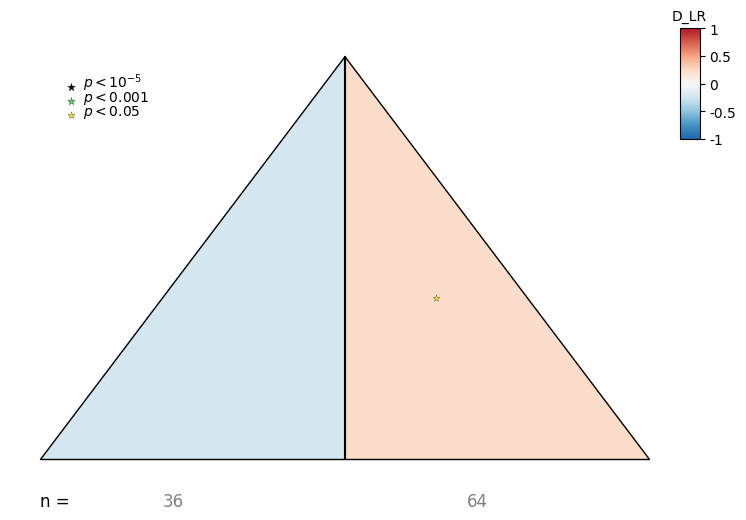

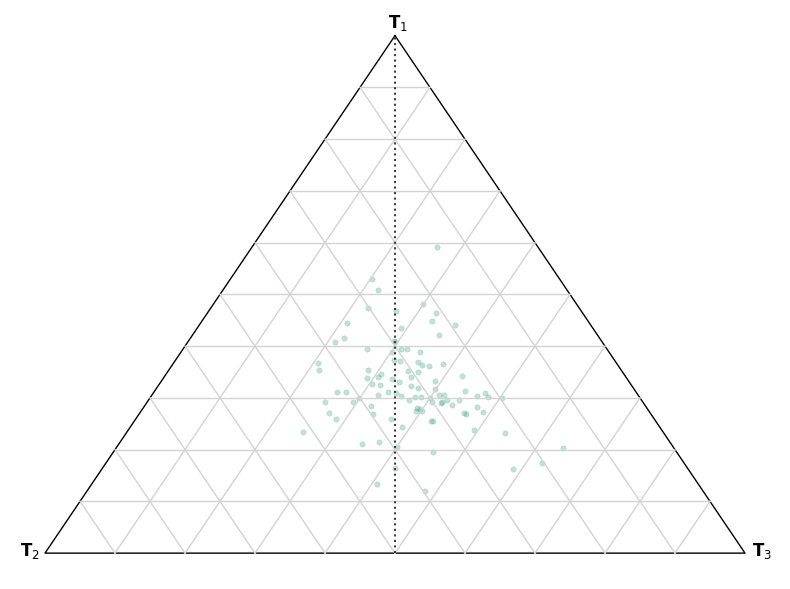

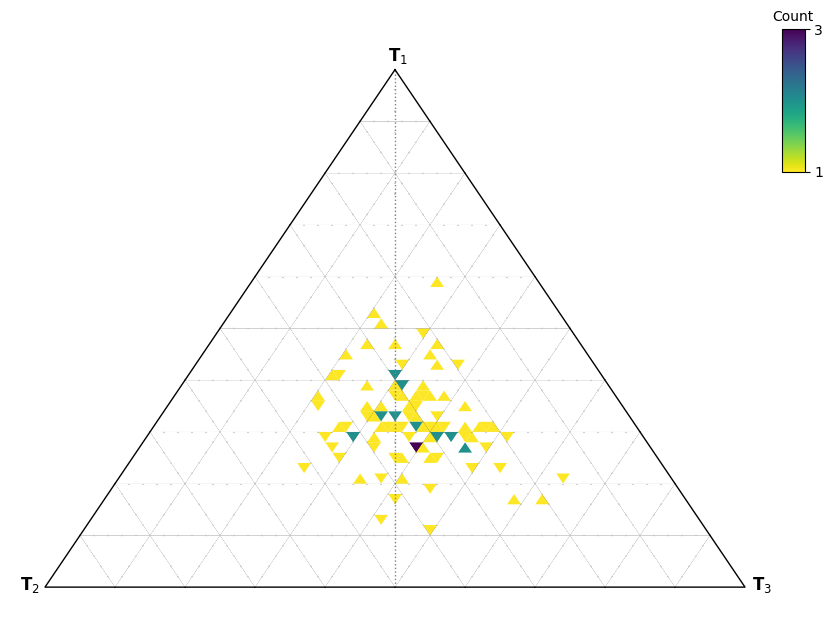

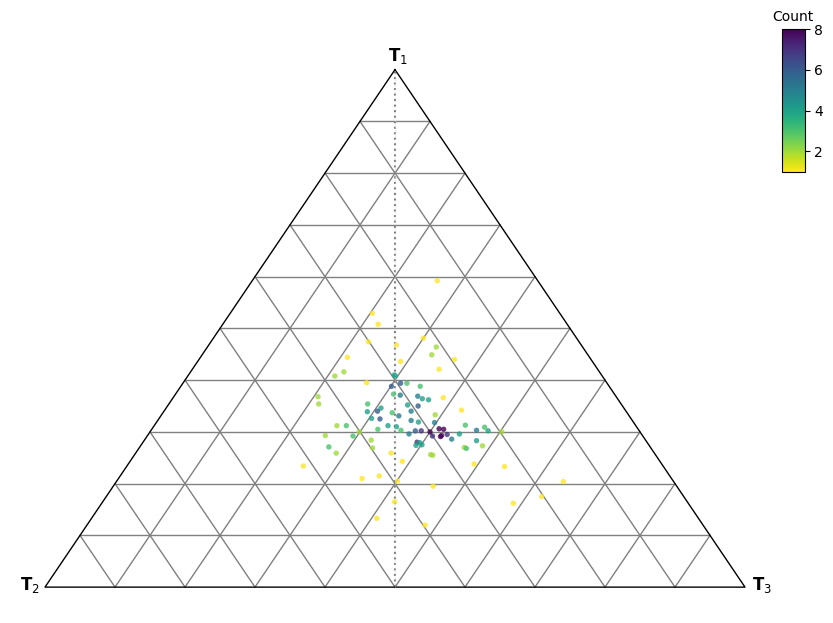

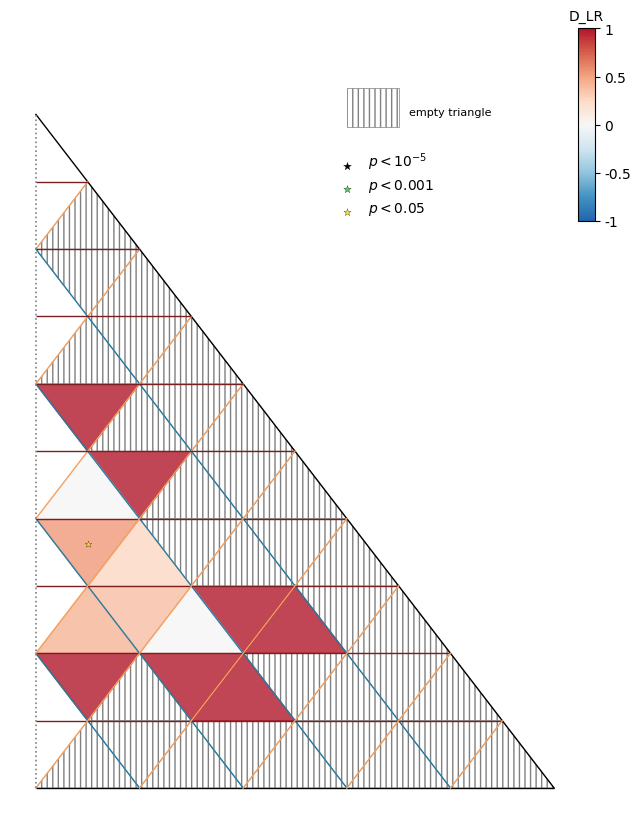

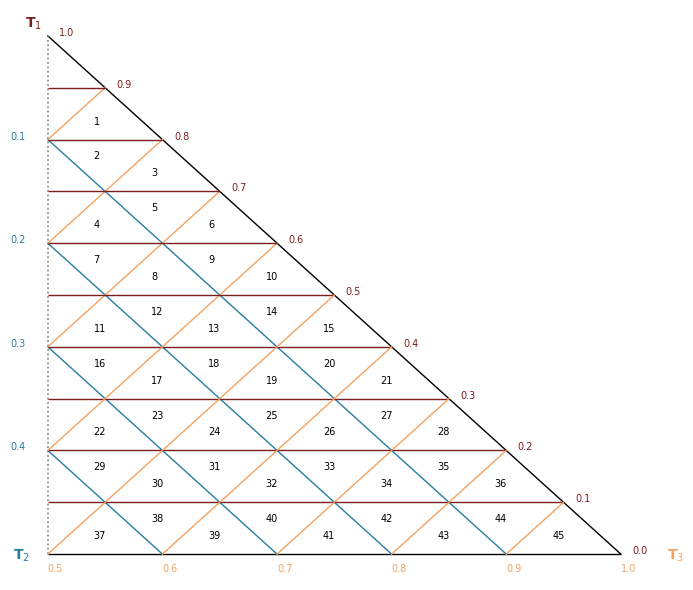

In [ ]:
from twisstntern_simulate.pipeline import run_pipeline

# Basic simulation and analysis
results_no_migration, fundamental_results_no_migration, csv_file_no_migration = run_pipeline(
    config_path="simulation_config.yaml",
    output_dir="simulation_results_no_migration",
    granularity=0.1,
)

## Comparing the Previous and Modified Simulation Scenarios: 
### **No Migrarion Vs Migration**

In this section, we compare the previous results to a tweaked scenario to demonstrate how **TWISSTNTERN** can detect differences in evolutionary histories.

We will use the same configuration file, modifying **only the migration parameter** via the `--override` command.

This controlled change allows us to isolate the effect of migration on the resulting topology weight distributions and visualize its impact on the inferred patterns.

INFO:twisstntern_simulate.pipeline:---------------------------------------------------------
INFO:twisstntern_simulate.pipeline:Starting twisstntern_simulate pipeline
INFO:twisstntern_simulate.pipeline:---------------------------------------------------------
INFO:twisstntern_simulate.pipeline:Loading configuration...
INFO:twisstntern_simulate.pipeline:Override applied: migration.p2>p1: 0.0 -> 0.5
INFO:twisstntern_simulate.pipeline:Override applied: migration.p1>p2: 0.0 -> 0.8
INFO:twisstntern_simulate.pipeline:Configuration loaded - Mode: locus, Seed: 4576
INFO:twisstntern.logger:============================================================
INFO:twisstntern.logger:SIMULATION CONFIGURATION
INFO:twisstntern.logger:============================================================
INFO:twisstntern.logger:Simulation mode: locus
INFO:twisstntern.logger:Random seed: 4576
INFO:twisstntern.logger:Number of populations: 7
INFO:twisstntern.logger:  O (Outgroup): Ne=1000.0, samples=10
INFO:twisstntern.

Simulating independent non-recombining loci...
Generated 10000 non-recombining loci


INFO:twisstntern_simulate.pipeline:Simulation completed
INFO:twisstntern_simulate.pipeline:Trees saved to: simulation_results_migration/locus_trees.newick
INFO:twisstntern_simulate.pipeline:Processing tree sequences...
INFO:twisstntern_simulate.pipeline:Locus mode: 10000 loci simulated.


✅ Saved trees: simulation_results_migration/locus_trees.newick


INFO:twisstntern_simulate.pipeline:Number of data points before downsampling: 9969
INFO:twisstntern_simulate.pipeline:No downsampling applied. Data points used: 9969
INFO:twisstntern_simulate.pipeline:Tree processing completed - weights saved to: simulation_results_migration/locus_topology_weights.csv
INFO:twisstntern_simulate.pipeline:Running triangle analysis...
INFO:twisstntern_simulate.pipeline:Running fundamental asymmetry analysis...
INFO:twisstntern_simulate.pipeline:============================================================
INFO:twisstntern_simulate.pipeline:FUNDAMENTAL ASYMMETRY RESULTS
INFO:twisstntern_simulate.pipeline:============================================================
INFO:twisstntern_simulate.pipeline:Data file used: simulation_results_migration/locus_topology_weights.csv
INFO:twisstntern_simulate.pipeline:n_loci simulated: 10000, total trees analyzed: 9969 (n_right + n_left = 9969)
INFO:twisstntern_simulate.pipeline:Note: 0 trees were filtered out (trees where


Weights with T2 == T3 removed. Remaining rows: 9969
No topology mapping was provided; displaying the default topology axis
Topology 1

   /-0
--|
  |   /-1
   \-|
     |   /-2
      \-|
         \-3
Topology 2

   /-0
--|
  |   /-2
   \-|
     |   /-1
      \-|
         \-3
Topology 3

   /-0
--|
  |   /-3
   \-|
     |   /-1
      \-|
         \-2
DEBUG - fundamental_asymmetry received data:
  Shape: (9969, 3)
  Dtypes: {'T1': dtype('float64'), 'T2': dtype('float64'), 'T3': dtype('float64')}
  Sample values: [0.332 0.216 0.452]



INFO:twisstntern_simulate.pipeline:Saved triangle analysis results to: simulation_results_migration/locus_triangle_analysis_0.1.csv
INFO:twisstntern_simulate.pipeline:Analysis pipeline completed successfully!
INFO:twisstntern_simulate.pipeline:Pipeline completed successfully - Results in: simulation_results_migration


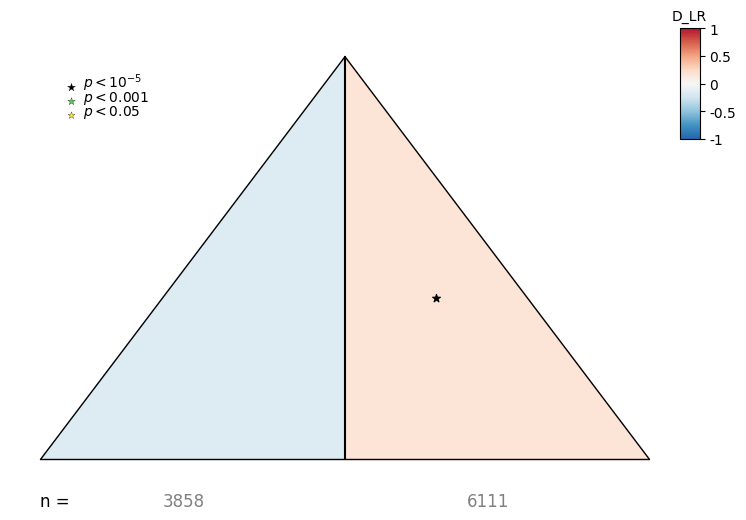

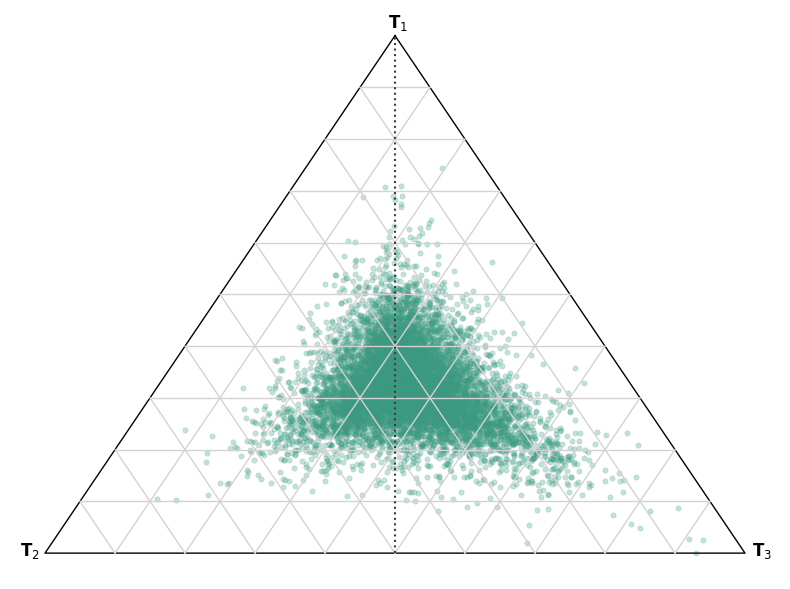

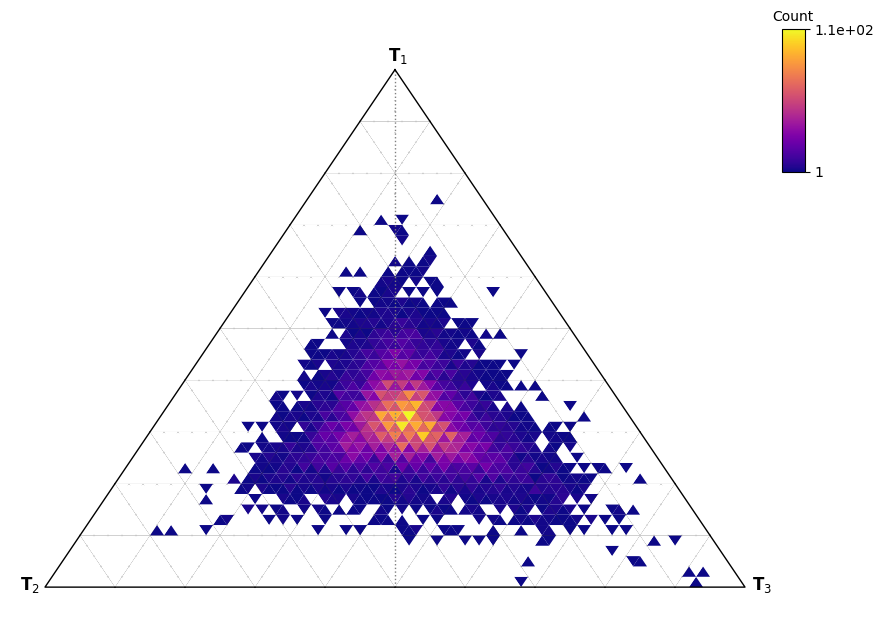

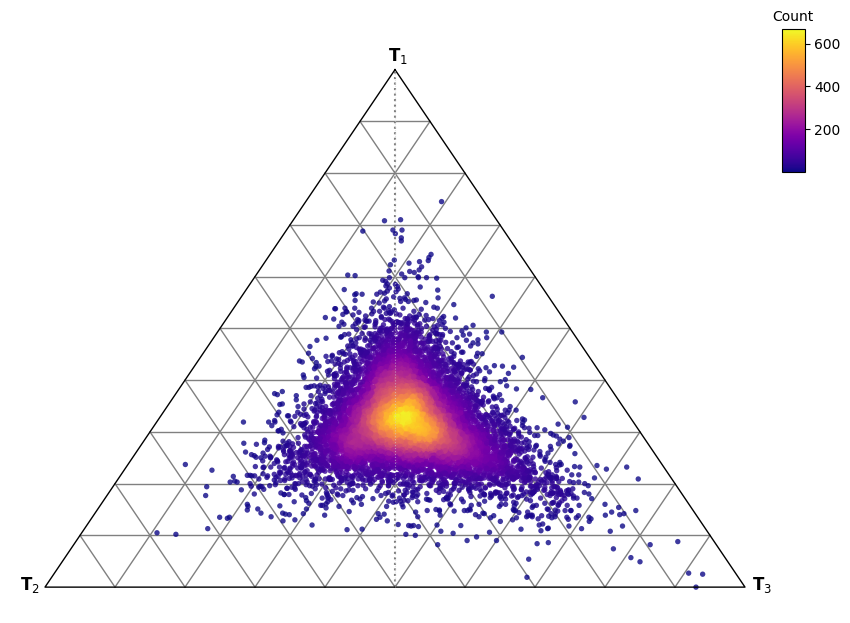

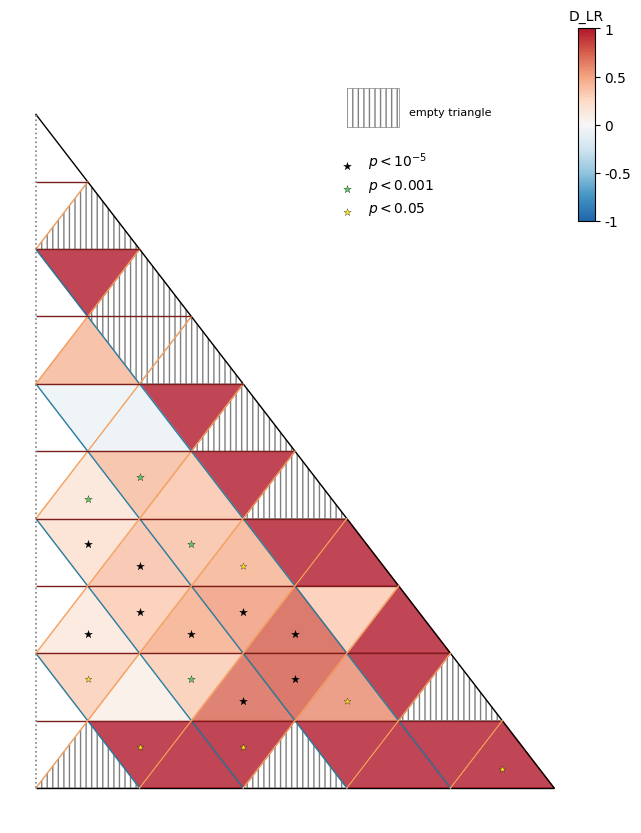

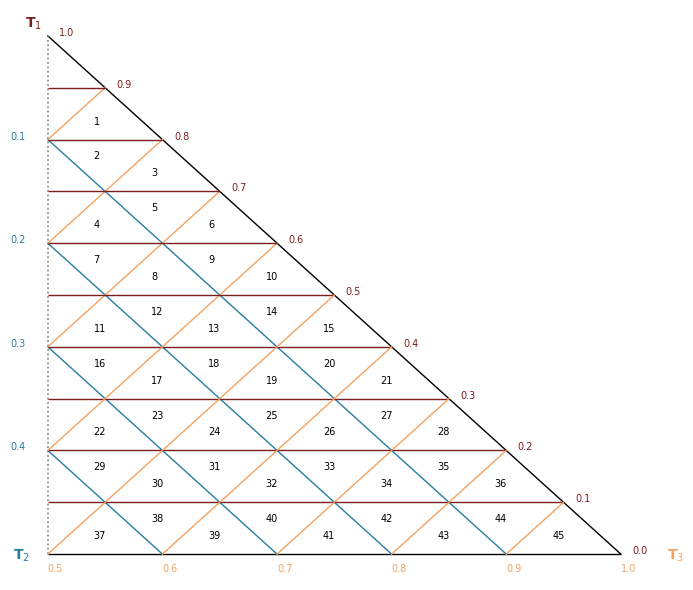

In [51]:
results_migration, fundamental_results_migration, csv_file_migration = run_pipeline(
    config_path="simulation_config.yaml",
    output_dir="simulation_results_migration",
    granularity=0.1,
    config_overrides=["migration.p2>p1=0.5", "migration.p1>p2=0.8"],
    colormap="plasma"  # just for fun
)


###  Summary 

You now have a working understanding of how to use **TWISSTNTERN** for analyzing topology weight data. Here's a recap of the key components covered:

1. **Installation** — How to install and configure TWISSTNTERN
2. **Data Preparation** — Formatting and understanding topology weight input files
3. **Python Interface** — Using the `run_analysis()` function within a script or notebook
4. **Command-Line Interface (CLI)** — Running analyses directly from the terminal
5. **Results Interpretation** — Understanding D_LR statistics and associated p-values
6. **Visualization** — Interpreting various plot types generated by the package
7. **Comparative Analysis** — Comparing different datasets or parameter settings

---

###  Recommended Next Steps

1. **Apply to your own data** — Use your own `.csv` files containing topology weights
2. **Tune analysis parameters** — Experiment with granularity and thresholds
3. **Review visual outputs** — Examine how different topologies behave across your dataset
4. **Consult the documentation** — Explore advanced options and configuration tips in the README

---

###  Resources & Support

- **Documentation**: [GitHub Repository](https://github.com/HilaLifchitz/twisstntern_v2)
- **Issue Tracker**: Use GitHub to report bugs or request features
- **Examples**: See the `Examples/` folder for demo notebooks and sample outputs
